In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# encoding categorical variables
#pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df=pd.get_dummies(df,drop_first=True)

<Axes: >

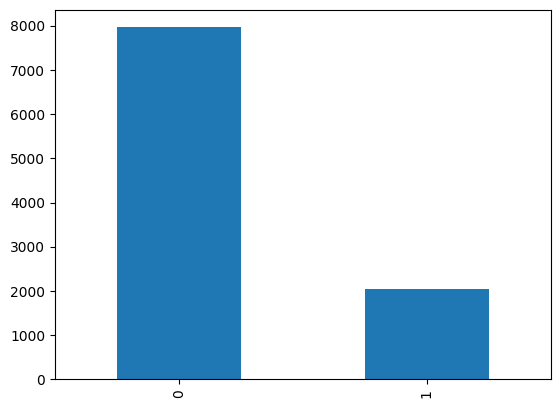

In [ ]:
df['Exited'].value_counts().plot(kind='bar')
# We will using smote due to imbalance data

# **Smote for imbalance data**

In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_sm,y_sm=SMOTE().fit_resample(X,y)

In [ ]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

# spliting data into training and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=.20,random_state=42)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
13555,524,47,5,124478.562115,1,0,0,159576.970681,1,0,1
1665,749,42,1,129776.720000,2,0,1,143538.510000,0,0,1
14878,474,44,6,110331.181967,1,1,0,5068.874424,1,0,0
7471,658,55,8,119327.930000,1,0,1,119439.660000,1,0,0
2582,656,46,5,113402.140000,2,1,1,138849.060000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13418,579,42,6,112033.237379,1,0,0,96924.051386,1,0,0
5390,735,38,1,0.000000,3,0,0,92220.120000,0,0,0
860,667,43,8,190227.460000,1,1,0,97508.040000,0,0,1
15795,512,51,6,191594.949867,1,0,0,131372.646303,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
X_train_scaled

array([[-1.36616423,  0.59668797,  0.06844613, ...,  1.74483364,
        -0.46213038,  1.19037753],
       [ 1.09959396,  0.09693747, -1.40640155, ..., -0.57312054,
        -0.46213038,  1.19037753],
       [-1.9141105 ,  0.29683767,  0.43715805, ...,  1.74483364,
        -0.46213038, -0.84006962],
       ...,
       [ 0.20096209,  0.19688757,  1.17458189, ..., -0.57312054,
        -0.46213038,  1.19037753],
       [-1.49767134,  0.99648837,  0.43715805, ..., -0.57312054,
        -0.46213038, -0.84006962],
       [ 0.52972985,  0.99648837, -1.40640155, ...,  1.74483364,
        -0.46213038,  1.19037753]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




In [ ]:
model=Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)


Epoch 1/200
204/204 [==============================] - 1s 2ms/step - loss: 0.6844 - accuracy: 0.6295 - val_loss: 0.6506 - val_accuracy: 0.7370
Epoch 2/200
204/204 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7523 - val_loss: 0.5636 - val_accuracy: 0.7590
Epoch 3/200
204/204 [==============================] - 0s 2ms/step - loss: 0.5277 - accuracy: 0.7718 - val_loss: 0.5017 - val_accuracy: 0.7692
Epoch 4/200
204/204 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7793 - val_loss: 0.4814 - val_accuracy: 0.7716
Epoch 5/200
204/204 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7831 - val_loss: 0.4742 - val_accuracy: 0.7763
Epoch 6/200
204/204 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7843 - val_loss: 0.4707 - val_accuracy: 0.7783
Epoch 7/200
204/204 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.7853 - val_loss: 0.4682 - val_accuracy: 0.7783

In [ ]:
y_pred=model.predict(X_test)

100/100 [==============================] - 0s 830us/step


In [ ]:
y_pred

array([[0.9507236 ],
       [0.009867  ],
       [0.11931438],
       ...,
       [0.009867  ],
       [0.009867  ],
       [0.009867  ]], dtype=float32)

In [ ]:
y_pred=y_pred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.5125549278091651

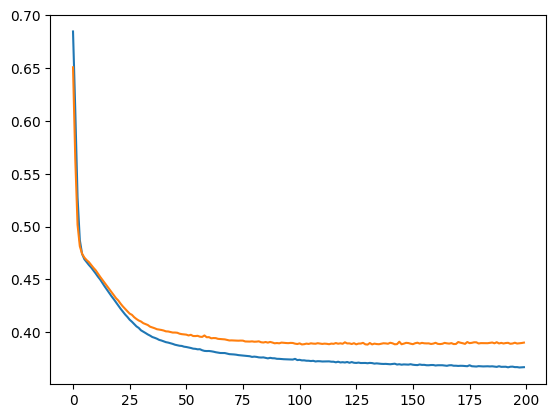

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

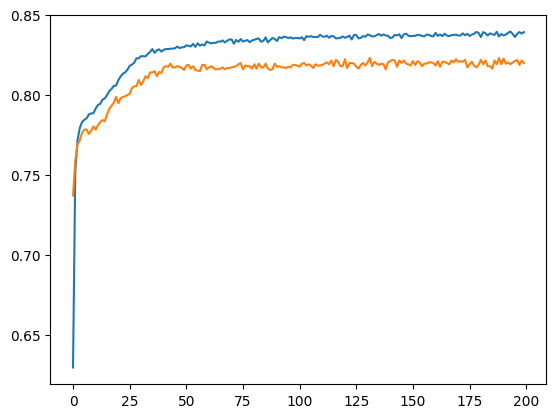

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])